Load the `ISLR2` and `tidyverse` packages.

In [102]:
library(tidyverse)
library(tidymodels)
library(ISLR2)

`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [104]:
Auto |> head()
#glimpse(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [105]:
cylinder_type = Auto |>
  distinct(cylinders)
cylinder_type |> head()

,cylinders
,<int>
1,8
2,4
3,6
4,3
5,5


Plot `mpg`  as a function of `displacement`.

`geom_smooth()` using formula = 'y ~ x'


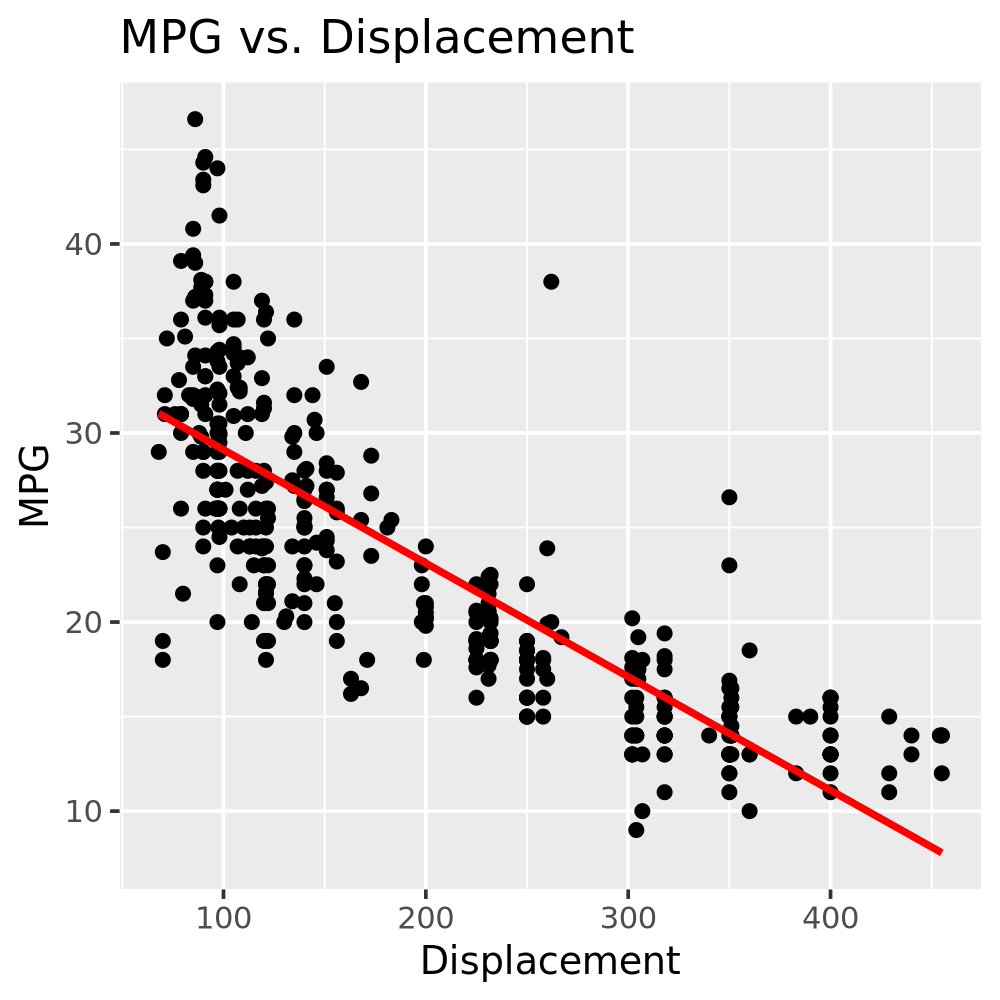

In [107]:
options(repr.plot.width = 4, repr.plot.height = 4)
ggplot(Auto, aes(x = displacement, y = mpg,)) +
  geom_point() + stat_smooth(method = "lm", se = FALSE, color = "red") +
  labs(x = "Displacement", y = "MPG", title = "MPG vs. Displacement")

❓Does the relationship of `mpg` to `displacement` look linear?

**The relationship of mpg to displacement is not quite linear from the plot above.**



Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

In [113]:
rec = recipe(mpg ~ displacement + cylinders, data = Auto) |>
  step_poly(displacement, options = c(raw = TRUE), degree = 5) |>
step_mutate(cyl_cat = factor(cylinders)) |>
  step_dummy(cyl_cat) |>
  step_rm(cylinders) |>
  prep()
juice(rec) |> head()

Warning message in opts$degree <- x$degree:
“Coercing LHS to a list”


mpg,displacement_poly_1,displacement_poly_2,displacement_poly_3,displacement_poly_4,displacement_poly_5,cyl_cat_X4,cyl_cat_X5,cyl_cat_X6,cyl_cat_X8
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,307,94249,28934443,8882874001,2.727042e+12,0,0,0,1
15,350,122500,42875000,15006250000,5.252188e+12,0,0,0,1
18,318,101124,32157432,10226063376,3.251888e+12,0,0,0,1
16,304,92416,28094464,8540717056,2.596378e+12,0,0,0,1
17,302,91204,27543608,8318169616,2.512087e+12,0,0,0,1
15,429,184041,78953589,33871089681,1.453070e+13,0,0,0,1


In [118]:
rec = recipe(mpg ~ displacement + cylinders, data = Auto) |>
step_mutate(cyl_cat = factor(cylinders)) 
rec |> head()

$var_info
# A tibble: 3 × 4
  variable     type      role      source  
  <chr>        <list>    <chr>     <chr>   
1 displacement <chr [2]> predictor original
2 cylinders    <chr [2]> predictor original
3 mpg          <chr [2]> outcome   original

$term_info
# A tibble: 3 × 4
  variable     type      role      source  
  <chr>        <list>    <chr>     <chr>   
1 displacement <chr [2]> predictor original
2 cylinders    <chr [2]> predictor original
3 mpg          <chr [2]> outcome   original

$steps
$steps[[1]]
$role
[1] "predictor"

$trained
[1] FALSE

$inputs
<list_of<quosure>>

$cyl_cat
<quosure>
expr: ^factor(cylinders)
env:  global


$skip
[1] FALSE

$id
[1] "mutate_ONlpQ"

attr(,"class")
[1] "step_mutate" "step"       


$template
# A tibble: 392 × 3
   displacement cylinders   mpg
          <dbl>     <int> <dbl>
 1          307         8    18
 2          350         8    15
 3          318         8    18
 4          304         8    16
 5          302         8    17
 6      

In [114]:
mod = linear_reg() |> set_engine("lm")
mod_fit = mod |> fit(mpg ~ ., data = rec |> juice())
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |> head()

.pred,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<fct>
15.84049,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
14.46248,15,8,350,165,3693,11.5,70,1,buick skylark 320
15.42093,18,8,318,150,3436,11.0,70,1,plymouth satellite
15.96135,16,8,304,150,3433,12.0,70,1,amc rebel sst
16.04330,17,8,302,140,3449,10.5,70,1,ford torino
13.68795,15,8,429,198,4341,10.0,70,1,ford galaxie 500


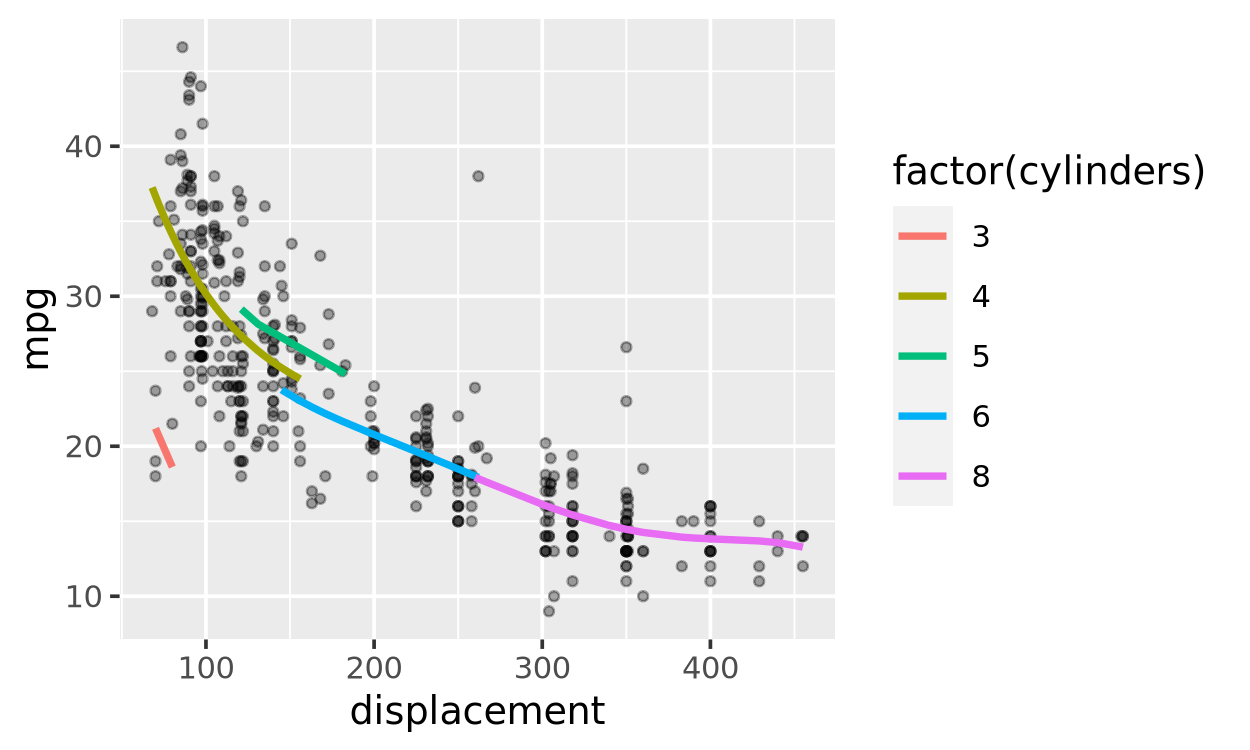

In [115]:
options(repr.plot.width = 5, repr.plot.height = 3)
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)